In [2]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

In [3]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [4]:
# load data
import pandas as pd
# load data
df=pd.read_csv('WECs_DataSet/Sydney_Data.csv', header = None)

# drop nan 
df = df.dropna()
# the head of df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,127.9439,264.9656,68.3481,521.7570,443.6997,195.9648,166.7701,504.2850,104.0226,205.2257,...,92861.7375,84584.2549,89041.0312,87204.4296,97380.7385,94753.7880,81677.9764,103129.6938,97196.8128,1463622.174
1,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,...,83029.8436,91483.7433,93748.1139,99467.6415,95935.6597,84254.7876,93786.3095,94499.4790,88941.7152,1489888.502
2,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,...,91309.1752,107598.5159,101897.2685,100876.0477,79350.0981,100060.2964,92733.9494,100646.9126,83394.8729,1495035.934
3,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,...,92083.6042,103182.5412,80688.8463,92306.4190,106440.6778,102118.7041,99295.1266,96503.3818,77942.2947,1459841.498
4,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,...,85602.1738,98370.5585,97148.3728,95775.0777,80723.5930,95865.7812,88525.7698,94546.5417,85021.1027,1475765.923


In [5]:
# df to values
df = df.values
Y = df[:,48]
X = df[:,0:48]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(72000, 48, 1)


In [6]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [7]:
x_test.shape

(14400, 48, 1)

In [8]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [9]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [10]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 57600 samples, validate on 14400 samples
Epoch 1/250
57600/57600 [==============================] - 49s 856us/step - loss: 108989544185.0653 - val_loss: 2474257267.8861
Epoch 2/250
57600/57600 [==============================] - 42s 737us/step - loss: 4948433499.8229 - val_loss: 1149785189.8611
Epoch 3/250
57600/57600 [==============================] - 42s 727us/step - loss: 4218300673.6170 - val_loss: 870509601.1986
Epoch 4/250
57600/57600 [==============================] - 44s 760us/step - loss: 4024232746.8646 - val_loss: 746154916.2403
Epoch 5/250
57600/57600 [==============================] - 44s 767us/step - loss: 3933769824.8319 - val_loss: 1001846648.6083
Epoch 6/250
57600/57600 [==============================] - 46s 791us/step - loss: 3911256230.3223 - val_loss: 1185487968.7278
Epoch 7/250
57600/57600 [==============================] - 44s 768us/step - loss: 3881887282.2208 - val_loss: 7

57600/57600 [==============================] - 42s 730us/step - loss: 3572490716.3347 - val_loss: 6478122009.6889
Epoch 59/250
57600/57600 [==============================] - 41s 713us/step - loss: 3565887598.8295 - val_loss: 7363864336.7111
Epoch 60/250
57600/57600 [==============================] - 42s 732us/step - loss: 3563605074.6885 - val_loss: 6663888948.8889
Epoch 61/250
57600/57600 [==============================] - 41s 710us/step - loss: 3562193277.9118 - val_loss: 8610391181.6000
Epoch 62/250
57600/57600 [==============================] - 41s 720us/step - loss: 3555881191.9828 - val_loss: 9283743049.7778
Epoch 63/250
57600/57600 [==============================] - 42s 736us/step - loss: 3542525380.6493 - val_loss: 7799219014.4889
Epoch 64/250
57600/57600 [==============================] - 42s 729us/step - loss: 3523370727.1885 - val_loss: 10415989612.2667
Epoch 65/250
57600/57600 [==============================] - 42s 728us/step - loss: 3534573921.2875 - val_loss: 10577918583.

Epoch 122/250
57600/57600 [==============================] - 43s 750us/step - loss: 3074020232.2946 - val_loss: 100827391726.9333
Epoch 123/250
57600/57600 [==============================] - 43s 755us/step - loss: 3057266874.8410 - val_loss: 93229216520.5333
Epoch 124/250
57600/57600 [==============================] - 44s 755us/step - loss: 3066590080.9806 - val_loss: 109972124273.7778
Epoch 125/250
57600/57600 [==============================] - 46s 791us/step - loss: 3033203525.7221 - val_loss: 102141984150.7556
Epoch 126/250
57600/57600 [==============================] - 45s 776us/step - loss: 3040286740.0431 - val_loss: 102200776686.9333
Epoch 127/250
57600/57600 [==============================] - 43s 749us/step - loss: 3002257248.7125 - val_loss: 111502553318.4000
Epoch 128/250
57600/57600 [==============================] - 44s 771us/step - loss: 3052385090.4990 - val_loss: 108154736725.3333
Epoch 129/250
57600/57600 [==============================] - 50s 876us/step - loss: 3013222

57600/57600 [==============================] - 40s 697us/step - loss: 2746117477.4285 - val_loss: 122405459840.0000
Epoch 186/250
57600/57600 [==============================] - 40s 700us/step - loss: 2739152428.8865 - val_loss: 121933069232.3556
Epoch 187/250
57600/57600 [==============================] - 40s 690us/step - loss: 2719749094.7012 - val_loss: 129729366357.3333
Epoch 188/250
57600/57600 [==============================] - 40s 694us/step - loss: 2752837025.1743 - val_loss: 127771010540.0889
Epoch 189/250
57600/57600 [==============================] - 39s 686us/step - loss: 2738936492.0965 - val_loss: 119066683690.6667
Epoch 190/250
57600/57600 [==============================] - 40s 697us/step - loss: 2744954127.0330 - val_loss: 117733444499.9111
Epoch 191/250
57600/57600 [==============================] - 40s 688us/step - loss: 2690776225.4127 - val_loss: 122005482925.5111
Epoch 192/250
57600/57600 [==============================] - 40s 699us/step - loss: 2712896895.8250 - va

57600/57600 [==============================] - 40s 691us/step - loss: 2350173212.7931 - val_loss: 56035631634.4889
Epoch 249/250
57600/57600 [==============================] - 40s 692us/step - loss: 2327110223.6450 - val_loss: 53533979972.2667
Epoch 250/250
57600/57600 [==============================] - 40s 691us/step - loss: 2326519294.5408 - val_loss: 56803023634.4889


In [11]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

57600/57600 [==============================] - 3s 54us/step
 Model.evaluate :  56859808927.28889 

Mean Squa Error : 56803022780.5706
Mean Abso Error : 237826.56009111114
Expl. Variance  : 0.5472144174215151


In [12]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 46, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 128)           24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)             

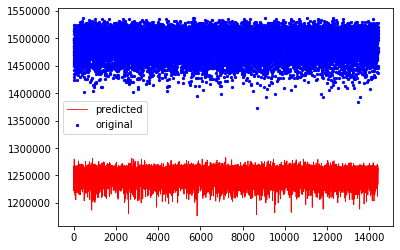

In [13]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

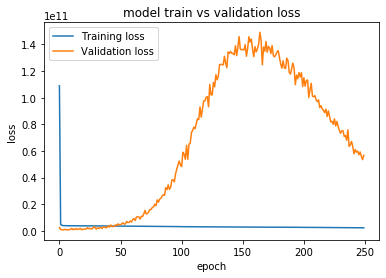

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [15]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [16]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [17]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (57600, 1)
Training Labels (from CNN) Shape: (57600,) 

Test Features (from CNN) Shape: (14400, 1)
Test Labels (from CNN) Shape: (14400,) 

Test Features original Shape: (57600, 48, 1)
Test Features original Shape: (14400, 48, 1)


### Classification by CNN + Random Forest + MLP

In [18]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']


 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.00046415888336127773
Optimal # epochs:  210
Optimal batch size:  2880



Epoch: 0001 cost= 1.191405535
Epoch: 0002 cost= 0.987820082
Epoch: 0003 cost= 0.807466537
Epoch: 0004 cost= 0.647176574
Epoch: 0005 cost= 0.509929601
Epoch: 0006 cost= 0.391754713
Epoch: 0007 cost= 0.295806838
Epoch: 0008 cost= 0.217287538
Epoch: 0009 cost= 0.150463518
Epoch: 0010 cost= 0.098054850

Epoch: 0207 cost= 0.006686316
Epoch: 0208 cost= 0.006687758
Epoch: 0209 cost= 0.006733761
Epoch: 0210 cost= 0.006711907
Optimization Finished!
Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 206324235.06406847
Mean Abso Error : 11412.49481340278
Expl. Variance  : 0.6132459090713013 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [19]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 366348716.7815958
Mean Abso Error : 15024.211446207539
Expl. Variance  : 0.3178842263599818 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 7.457534215591784e+40
Mean Abso Error : 2.7307124192661907e+20
Expl. Variance  : -1.3944381860388618e+28 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

MemoryError: 

In [ ]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

In [ ]:
out_cnn_train.shape

###  MLP

In [ ]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [ ]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [ ]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)